In [1]:
#Data Pre-Processing

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('US_Accidents_Dec20.csv')
print("The shape of data is:",(df.shape))
display(df.head(3))

The shape of data is: (4232541, 49)


,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day


In [4]:
#split 'Start-Time attribute into Year,month,weekday,day,hours and minutes'
df["Start_Time"] = pd.to_datetime(df["Start_Time"])
df["Hour"] = df["Start_Time"].dt.hour
df["Minute"] = df["Start_Time"].dt.minute
df["Year"] = df["Start_Time"].dt.year
df["Month"] = df["Start_Time"].dt.month
df["Weekday"] = df["Start_Time"].dt.weekday
df["Day"] = df["Start_Time"].dt.day
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hour,Minute,Year,Month,Weekday,Day
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,Night,Night,Night,Night,5,46,2016,2,0,8
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,Night,Night,Night,Day,6,7,2016,2,0,8
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,Night,Night,Day,Day,6,49,2016,2,0,8
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,Night,Day,Day,Day,7,23,2016,2,0,8
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,Day,Day,Day,Day,7,39,2016,2,0,8


In [5]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Hour', 'Minute', 'Year', 'Month', 'Weekday',
       'Day'],
      dtype='object')

In [6]:
#After Exploratory Data Analysis we found that there are few feature that can be dropped based on least significance and redundant atrributes , so that model can be trained on cleaned dataset.
least_Significant_features_to_drop = ["ID", "Source", "TMC", "Start_Time", "End_Time", "End_Lat", "End_Lng", 
                                      "Description", "Number", "Street", "County", "State", "Zipcode", "Country", 
                                      "Timezone", "Airport_Code", "Weather_Timestamp", "Wind_Chill(F)", "Turning_Loop"
                                      , "Sunrise_Sunset", "Nautical_Twilight", "Astronomical_Twilight"]
#newSet = df.drop(least_Significant_features_to_drop, axis=1)
df = df.drop(least_Significant_features_to_drop, axis=1)
#newSet.head()
df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),...,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Hour,Minute,Year,Month,Weekday,Day
0,3,39.865147,-84.058723,0.01,R,Dayton,36.9,91.0,29.68,10.0,...,False,False,False,Night,5,46,2016,2,0,8
1,2,39.928059,-82.831184,0.01,L,Reynoldsburg,37.9,100.0,29.65,10.0,...,False,False,False,Night,6,7,2016,2,0,8
2,2,39.063148,-84.032608,0.01,R,Williamsburg,36.0,100.0,29.67,10.0,...,False,False,True,Night,6,49,2016,2,0,8
3,3,39.747753,-84.205582,0.01,R,Dayton,35.1,96.0,29.64,9.0,...,False,False,False,Day,7,23,2016,2,0,8
4,2,39.627781,-84.188354,0.01,R,Dayton,36.0,89.0,29.65,6.0,...,False,False,True,Day,7,39,2016,2,0,8


In [7]:
#Now we will check if data has some duplicates value and remove them from the dataset
print("Total Number of rows:", len(df.index))
#newSet.drop_duplicates(inplace=True)
df.drop_duplicates
print("Total number of rows after removing duplicates:", len(df.index))

Total Number of rows: 4232541
Total number of rows after removing duplicates: 4232541


In [8]:
#Handling incorrect and missing values

In [9]:
#initially looking at the Side column
df["Side"].value_counts()

R    3467079
L     765461
           1
Name: Side, dtype: int64

In [10]:
#the output shows 1 record without Side so that can be dropped
df = df[df["Side"] != " "]
df["Side"].value_counts()

R    3467079
L     765461
Name: Side, dtype: int64

In [11]:
#next looking at visibility and pressure
df[["Visibility(mi)", "Pressure(in)"]].describe().round(2)

,Visibility(mi),Pressure(in)
count,4133872.00,4156156.00
mean,9.11,29.69
std,2.82,0.86
min,0.00,0.00
25%,10.00,29.64
50%,10.00,29.93
75%,10.00,30.08
max,140.00,58.04


In [12]:
#the output shows min as 0 which informs us that a number of records are missing them and have been replaced with 0
#we are dropping the records with missing values for visibility and pressure

df = df[df["Visibility(mi)"] != 0]
df = df[df["Pressure(in)"] != 0]
df[["Visibility(mi)", "Pressure(in)"]].describe().round(2)

,Visibility(mi),Pressure(in)
count,4131229.00,4153515.00
mean,9.12,29.69
std,2.81,0.86
min,0.06,0.02
25%,10.00,29.64
50%,10.00,29.93
75%,10.00,30.08
max,140.00,58.04


In [13]:
#analyzing the weather conditions
#outputting the total number of different conditions and their names

weather_conditions = df["Weather_Condition"].unique()
print("Total number of weather conditions: ", len(weather_conditions), "\n")
print(weather_conditions)

Total number of weather conditions:  132 

['Light Rain' 'Overcast' 'Mostly Cloudy' 'Rain' 'Light Snow' 'Haze'
 'Scattered Clouds' 'Partly Cloudy' 'Clear' 'Snow'
 'Light Freezing Drizzle' 'Light Drizzle' 'Fog' 'Shallow Fog' 'Heavy Rain'
 'Light Freezing Rain' 'Cloudy' 'Drizzle' nan 'Light Rain Showers' 'Mist'
 'Smoke' 'Patches of Fog' 'Light Freezing Fog' 'Light Haze'
 'Light Thunderstorms and Rain' 'Thunderstorms and Rain' 'Fair'
 'Volcanic Ash' 'Blowing Sand' 'Blowing Dust / Windy' 'Widespread Dust'
 'Fair / Windy' 'Rain Showers' 'Mostly Cloudy / Windy'
 'Light Rain / Windy' 'Hail' 'Heavy Drizzle' 'Showers in the Vicinity'
 'Thunderstorm' 'Light Rain Shower' 'Light Rain with Thunder'
 'Partly Cloudy / Windy' 'Thunder in the Vicinity' 'T-Storm'
 'Heavy Thunderstorms and Rain' 'Thunder' 'Heavy T-Storm' 'Funnel Cloud'
 'Heavy T-Storm / Windy' 'Blowing Snow' 'Light Thunderstorms and Snow'
 'Heavy Snow' 'Low Drifting Snow' 'Light Ice Pellets' 'Ice Pellets'
 'Squalls' 'N/A Precipitation' '

In [14]:
#reducing the amount of weather conditions by substituting them with a more common name

df.loc[df["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"
df.loc[df["Weather_Condition"].str.contains("Mist|Haze|Fog", na=False), "Weather_Condition"] = "Fog"
df.loc[df["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
df.loc[df["Weather_Condition"].str.contains("Cloud|Overcast", na=False), "Weather_Condition"] = "Cloudy"
df.loc[df["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
df.loc[df["Weather_Condition"].str.contains("Rain|Drizzle|Shower", na=False), "Weather_Condition"] = "Rain"
df.loc[df["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
df.loc[df["Weather_Condition"].str.contains("Fair", na=False), "Weather_Condition"] = "Clear"
df.loc[df["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
df.loc[df["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
df.loc[df["Weather_Condition"].str.contains("N/A Precipitation", na=False), "Weather_Condition"] = np.nan

common_weather = df["Weather_Condition"].unique()
print("Total number of weather conditions: ", len(common_weather), "\n")
print(common_weather)

Total number of weather conditions:  12 

['Rain' 'Cloudy' 'Snow' 'Fog' 'Clear' nan 'Smoke' 'Sand' 'Windy' 'Hail'
 'Thunderstorm' 'Tornado']


In [15]:
#after checking the weather conditions, we are analyzing the wind directions
#outputting the total number of different directions and their names

wind_directions = df["Wind_Direction"].unique()
print("Total number of wind directions: ", len(wind_directions), "\n")
print(wind_directions)

Total number of wind directions:  25 

['Calm' 'SW' 'SSW' 'WSW' 'WNW' 'NW' 'West' 'NNW' 'NNE' 'South' 'North'
 'Variable' 'SE' 'SSE' 'ESE' 'East' 'NE' 'ENE' 'E' 'W' nan 'S' 'VAR'
 'CALM' 'N']


In [16]:
#similarly to weather conditions, we reduce the amount of wind directions by grouping the values

df.loc[df["Wind_Direction"] == "North", "Wind_Direction"] = "N"
df.loc[df["Wind_Direction"] == "East", "Wind_Direction"] = "E"
df.loc[df["Wind_Direction"] == "South", "Wind_Direction"] = "S"
df.loc[df["Wind_Direction"] == "West", "Wind_Direction"] = "W"
df.loc[df["Wind_Direction"] == "CALM", "Wind_Direction"] = "Calm"
df.loc[df["Wind_Direction"] == "VAR", "Wind_Direction"] = "Variable"
df["Wind_Direction"] = df["Wind_Direction"].map(lambda i : i if len(i) != 3 else i[1:], na_action="ignore")
common_direction = df["Wind_Direction"].unique()

print("Total number of wind directions: ", len(common_direction), "\n")
print(common_direction)

Total number of wind directions:  11 

['Calm' 'SW' 'NW' 'W' 'NE' 'S' 'N' 'Variable' 'SE' 'E' nan]


In [17]:
#analyzing the missing values
df.isna().sum()

Severity                   0
Start_Lat                  0
Start_Lng                  0
Distance(mi)               0
Side                       0
City                     137
Temperature(F)         89873
Humidity(%)            95422
Pressure(in)           76381
Visibility(mi)         98667
Wind_Direction         83601
Wind_Speed(mph)       479284
Precipitation(in)    2065296
Weather_Condition      99024
Amenity                    0
Bump                       0
Crossing                   0
Give_Way                   0
Junction                   0
No_Exit                    0
Railway                    0
Roundabout                 0
Station                    0
Stop                       0
Traffic_Calming            0
Traffic_Signal             0
Civil_Twilight           141
Hour                       0
Minute                     0
Year                       0
Month                      0
Weekday                    0
Day                        0
dtype: int64

In [18]:
#from the output, we identified that many of the records don't contain informations about Precipitation so we will drop that feature
#we fill in the missing features with the mean for numerical features 
#we delete the records with missing informations for categorical features
fill_features = ["Temperature(F)", "Humidity(%)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)"]
df[fill_features] = df[fill_features].fillna(df[fill_features].mean())
df.dropna(inplace=True)
df.isna().sum()

Severity             0
Start_Lat            0
Start_Lng            0
Distance(mi)         0
Side                 0
City                 0
Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Civil_Twilight       0
Hour                 0
Minute               0
Year                 0
Month                0
Weekday              0
Day                  0
dtype: int64

In [19]:
#verifying the variance for the features

In [20]:
#verifying the variances to see if we need to eliminate features with a low value

df.describe().round(2)

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Hour,Minute,Year,Month,Weekday,Day
count,4116856.00,4116856.00,4116856.00,4116856.00,4116856.00,4116856.00,4116856.00,4116856.00,4116856.00,4116856.00,4116856.00,4116856.00,4116856.00,4116856.00,4116856.00,4116856.00
mean,2.30,36.38,-95.48,0.33,61.51,65.68,29.69,9.12,7.90,0.01,12.14,29.97,2018.45,7.19,2.46,15.91
std,0.53,4.98,17.33,1.59,18.47,22.66,0.86,2.81,5.08,0.11,5.47,17.29,1.33,3.56,1.75,8.70
min,1.00,24.56,-124.62,0.00,-89.00,1.00,0.02,0.06,0.00,0.00,0.00,0.00,2016.00,1.00,0.00,1.00
25%,2.00,33.51,-117.36,0.00,49.30,49.00,29.64,10.00,5.00,0.00,8.00,15.00,2017.00,4.00,1.00,9.00
50%,2.00,35.80,-90.00,0.00,63.00,68.00,29.93,10.00,7.91,0.01,12.00,30.00,2019.00,8.00,2.00,16.00
75%,3.00,40.20,-80.87,0.08,75.00,85.00,30.08,10.00,10.00,0.01,17.00,45.00,2020.00,10.00,4.00,23.00
max,4.00,49.00,-67.11,441.75,189.00,100.00,58.04,140.00,984.00,25.00,23.00,59.00,2020.00,12.00,6.00,31.00


In [21]:
#Encode target labels with value between 0 and n_classes-1
encoder = preprocessing.LabelEncoder()
df['Bump'] = encoder.fit_transform(df['Bump'])
df['Amenity'] = encoder.fit_transform(df['Amenity'])
df['Crossing'] = encoder.fit_transform(df['Crossing'])
df['Give_Way'] = encoder.fit_transform(df['Give_Way'])
df['Junction'] = encoder.fit_transform(df['Junction'])
df['No_Exit'] = encoder.fit_transform(df['No_Exit'])
df['Railway'] = encoder.fit_transform(df['Railway'])
df['Roundabout'] = encoder.fit_transform(df['Roundabout'])
df['Station'] = encoder.fit_transform(df['Station'])
df['Stop'] = encoder.fit_transform(df['Stop'])
df['Traffic_Calming'] = encoder.fit_transform(df['Traffic_Calming'])
df['Traffic_Signal'] = encoder.fit_transform(df['Traffic_Signal'])
df['City'] = encoder.fit_transform(df['City'])
df['Weather_Condition'] = encoder.fit_transform(df['Weather_Condition'])
df['Wind_Direction'] = encoder.fit_transform(df['Wind_Direction'])
df['Side'] = encoder.fit_transform(df['Side'])
df['Civil_Twilight'] = encoder.fit_transform(df['Civil_Twilight'])

In [22]:
df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),...,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Hour,Minute,Year,Month,Weekday,Day
0,3,39.865147,-84.058723,0.01,1,2577,36.9,91.0,29.68,10.0,...,0,0,0,1,5,46,2016,2,0,8
1,2,39.928059,-82.831184,0.01,0,8978,37.9,100.0,29.65,10.0,...,0,0,0,1,6,7,2016,2,0,8
2,2,39.063148,-84.032608,0.01,1,11741,36.0,100.0,29.67,10.0,...,0,0,1,1,6,49,2016,2,0,8
3,3,39.747753,-84.205582,0.01,1,2577,35.1,96.0,29.64,9.0,...,0,0,0,0,7,23,2016,2,0,8
4,2,39.627781,-84.188354,0.01,1,2577,36.0,89.0,29.65,6.0,...,0,0,1,0,7,39,2016,2,0,8


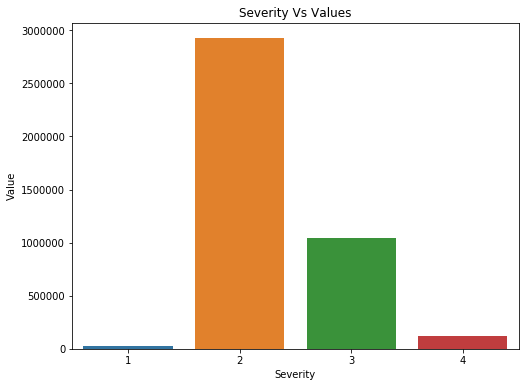

In [23]:
severityCount = df['Severity'].value_counts()
plt.figure(figsize=(8, 6))
plt.title("Severity Vs Values")
sns.barplot(severityCount.index, severityCount.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()

In [24]:
#Data distribution is not uniform, Severity 2 has more no. of rows whereas Severity 1 has lesser no. of rows.
#So,we take only 28718 records for all Severity ranges

In [25]:
print('No. of rows in Severity 1')
print(len(df[df["Severity"]==1].index))
print('No. of rows in Severity 4')
print(len(df[df["Severity"]==4].index))

No. of rows in Severity 1
28718
No. of rows in Severity 4
119248


In [43]:
X = pd.DataFrame()
size=28718
for i in range(1,2):
    S = df[df['Severity']==i]
    temp = S.sample(size, random_state=42)
    X = X.append(temp)

In [44]:
size = 80000

#We are taking 80000 sample points from each Severity - 2,3,4
for i in range(2,5):
    S = df[df['Severity']==i]
    temp = S.sample(size, random_state=42)
    X = X.append(temp)

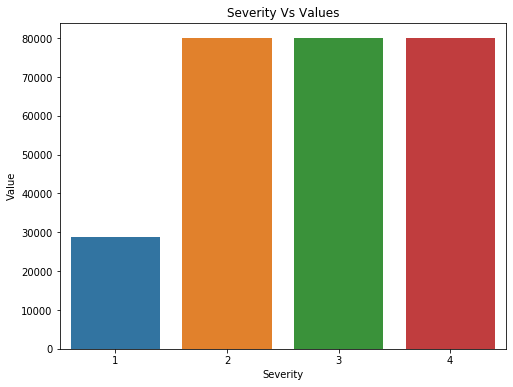

In [45]:
severityCount = X['Severity'].value_counts()
plt.figure(figsize=(8, 6))
plt.title("Severity Vs Values")
sns.barplot(severityCount.index, severityCount.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()

In [46]:
X.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Side', 'City',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Civil_Twilight', 'Hour', 'Minute',
       'Year', 'Month', 'Weekday', 'Day'],
      dtype='object')

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
featuresForScaling = ['Start_Lat', 'Start_Lng','Distance(mi)','Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)','Wind_Speed(mph)', 'Precipitation(in)','Hour', 'Minute',
       'Year', 'Month', 'Weekday', 'Day', 'City', 'Wind_Direction', 'Weather_Condition']
X[featuresForScaling] = scaler.fit_transform(X[featuresForScaling])
X.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),...,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Hour,Minute,Year,Month,Weekday,Day
3608693,1,0.549821,0.043080,0.000000,1,0.180700,0.665049,0.673469,0.513855,0.098474,...,0,0,0,1,0.000000,0.661017,1.0,0.272727,0.500000,0.033333
3557570,1,0.316786,0.236738,0.000000,1,0.904247,0.907767,0.020408,0.463110,0.098474,...,0,0,1,0,0.826087,0.322034,1.0,0.454545,0.666667,0.600000
3598039,1,0.314958,0.239141,0.000007,0,0.904247,0.684466,0.377551,0.465362,0.098474,...,0,0,1,0,0.478261,0.711864,1.0,0.181818,0.666667,0.866667
3511994,1,0.461897,0.780471,0.000000,1,0.886377,0.834951,0.489796,0.499654,0.098474,...,0,0,0,0,0.652174,0.254237,1.0,0.454545,0.333333,0.766667
3583845,1,0.514680,0.044167,0.000000,1,0.508603,0.689320,0.683673,0.516973,0.098474,...,0,0,0,0,0.391304,0.406780,1.0,0.181818,0.666667,0.633333


In [32]:
#categoryFeatures = set(["Side","Weather_Condition", "Wind_Direction", "Civil_Twilight"])
#for cat in categoryFeatures:
 #   X[cat] = X[cat].astype("category")
#for cat in categoryFeatures:
 #   size = len(X[cat].unique())
  #  print("Category: "+cat+"  Count:" +str(size)) 

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208718 entries, 3608693 to 2797538
Data columns (total 33 columns):
Severity             208718 non-null int64
Start_Lat            208718 non-null float64
Start_Lng            208718 non-null float64
Distance(mi)         208718 non-null float64
Side                 208718 non-null int32
City                 208718 non-null float64
Temperature(F)       208718 non-null float64
Humidity(%)          208718 non-null float64
Pressure(in)         208718 non-null float64
Visibility(mi)       208718 non-null float64
Wind_Direction       208718 non-null float64
Wind_Speed(mph)      208718 non-null float64
Precipitation(in)    208718 non-null float64
Weather_Condition    208718 non-null float64
Amenity              208718 non-null int64
Bump                 208718 non-null int64
Crossing             208718 non-null int64
Give_Way             208718 non-null int64
Junction             208718 non-null int64
No_Exit              208718 non-null int6

In [48]:
#X = pd.get_dummies(X, columns=categoryFeatures, drop_first=True)
#X.head()

In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268718 entries, 3608693 to 4016414
Data columns (total 33 columns):
Severity             268718 non-null int64
Start_Lat            268718 non-null float64
Start_Lng            268718 non-null float64
Distance(mi)         268718 non-null float64
Side                 268718 non-null int32
City                 268718 non-null float64
Temperature(F)       268718 non-null float64
Humidity(%)          268718 non-null float64
Pressure(in)         268718 non-null float64
Visibility(mi)       268718 non-null float64
Wind_Direction       268718 non-null float64
Wind_Speed(mph)      268718 non-null float64
Precipitation(in)    268718 non-null float64
Weather_Condition    268718 non-null float64
Amenity              268718 non-null int64
Bump                 268718 non-null int64
Crossing             268718 non-null int64
Give_Way             268718 non-null int64
Junction             268718 non-null int64
No_Exit              268718 non-null int6

In [50]:
#Decision Tree
sampleSet = X
Y = sampleSet["Severity"]
X_sample = sampleSet.drop("Severity", axis=1)

In [51]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_sample, Y, random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(201538, 32) (201538,)
(67180, 32) (67180,)


In [52]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer
clf = DecisionTreeClassifier(random_state=42)

#Train the classifier
parameter = [{"criterion":["gini", "entropy"], "max_depth": [5,10,15,30]}]

#cross-validated grid-search
grid = GridSearchCV(clf,parameter,verbose = 5,n_jobs=-1)
grid.fit(X_train,y_train)

C:\Users\gopal\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  14 out of  24 | elapsed:    9.6s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done  19 out of  24 | elapsed:   13.2s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   16.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   16.4s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 10, 15, 30]}],
             pre_

In [53]:
#Print parameter score
print("Parameter score using GridSearchCV in sklearn")
print("Parameter score: ",grid.best_params_)
print("Training score: ",grid.score(X_train, y_train))
print("Test score: ",grid.score(X_test, y_test))

Parameter score using GridSearchCV in sklearn
Parameter score:  {'criterion': 'gini', 'max_depth': 15}
Training score:  0.8016751183399656
Test score:  0.7274337600476333


In [54]:
#Print parameter score
print("Scoring only using the decision tree classifier")
clf.fit(X_train,y_train)
print("Training score: ",clf.score(X_train, y_train))
print("Test score: ",clf.score(X_test, y_test))

Scoring only using the decision tree classifier
Training score:  0.9996526709603152
Test score:  0.6942691277165823
